In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Camera Calibration

In [2]:
img_fps = [os.path.join('chessboard', f) for f in os.listdir('chessboard')]


In [3]:
# 使用cv2讀取img_fps[-1]
#=============your works starts===============#
img = cv2.imread(img_fps[-1])
#==============your works ends================#


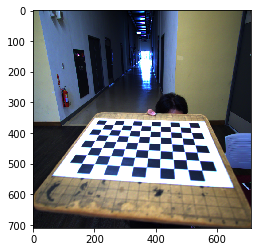

In [4]:
# 使用cv2.cvtColor()將影像轉成RGB(COLOR_BGR2RGB)
# 使用plt.imshow呈現圖片img
#!=============your works starts===============!#
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#!==============your works ends================!#

plt.show()

In [5]:
# 定義chessboard的網格數，黑白格焦點的個數，先row後col
# 使用cv2.cvtColor將影像轉為灰階(COLOR_BGR2GRAY)
# 使用cv2.findChessboardCorners找出棋盤所在座標點
#=============your works starts===============#
CHECKERBOARD = (7, 10)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD)
#==============your works ends================#


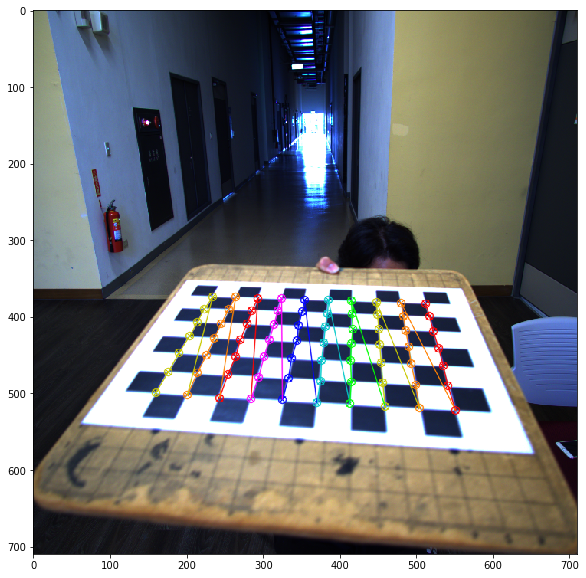

In [6]:
# 使用cv2.drawChessboardCorners畫上棋盤網格點
# 使用plt.figure初始化畫布，並定義畫布大小為(10, 10)
# 使用cv2.cvtColor將影像img_draw轉為RGB(COLOR_BGR2RGB)並使用plt.imshow呈現影像
#=============your works starts===============#
img_draw = cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
#==============your works ends================#

plt.show()


In [7]:
BLOCK_SIZE = 34 # mm

# 定義期盤的空間座標，2個維度(棋盤座標點個數(棋盤寬度*棋盤高度), 3(XYZ))，設定dtype維float32 
# 使用np.mgrid初始化棋盤網格座標
# 乘上BLOCK_SIZE讓座標具有空間意義
#=============your works starts===============#
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
objp = objp*BLOCK_SIZE
#==============your works ends================#

print(objp[:3])
# [[ 0.  0.  0.]
#  [34.  0.  0.]
#  [68.  0.  0.]]

[[ 0.  0.  0.]
 [34.  0.  0.]
 [68.  0.  0.]]


In [8]:
objpoints, imgpoints = [], []
for img_fp in img_fps:
# 使用cv2讀取img_fp
# 使用cv2.cvtColor將影像轉為灰階(COLOR_BGR2GRAY)
# 使用cv2.findChessboardCorners找出棋盤所在座標點
#=============your works starts===============#
    img = cv2.imread(img_fp)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD)
#==============your works ends================#
    corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
    if ret == True: # 如果有成功找到
        objpoints.append(objp)
        imgpoints.append(corners2[:, 0, :])
objpoints, imgpoints = np.array(objpoints), np.array(imgpoints)

print("shape of objpoints:", objpoints.shape)
print("shape of imgpoints:", imgpoints.shape)
print(imgpoints[0][:3])
# number of imgs: 48
# shape of chessboard points: (70, 1, 2)
# [[[234.03487 555.5401 ]]
#  [[232.59099 573.64136]]
#  [[231.52182 591.5219 ]]]

shape of objpoints: (48, 70, 3)
shape of imgpoints: (48, 70, 2)
[[233.97539 555.5035 ]
 [232.6187  573.6702 ]
 [231.61375 591.572  ]]


In [9]:
# 取得img_fps[0]之長與寬
# 使用cv2.calibrateCamera取得相機參數以、方位校正參數、R與T，並設定cameraMatrix=None與distCoeffs=None
# 使用cv2.getOptimalNewCameraMatrix取得內方位校正後的相機參數，並校正影像中心為像主點。
#=============your works starts===============#
h, w = cv2.imread(img_fps[0]).shape[:2]
ret, mtx_ori, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w, h), None, None)
mtx, roi = cv2.getOptimalNewCameraMatrix(mtx_ori, dist, (w, h), 1, (w, h), True)
#==============your works ends================#


In [10]:
objpoints, imgpoints = [], []
for img_fp in img_fps:
    img = cv2.imread(img_fp)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 使用cv2.undistort校正相片
#=============your works starts===============#
    gray = cv2.undistort(gray, mtx_ori, dist, None, mtx)
#==============your works ends================#
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD)
    corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
    if ret == True: # 如果有成功找到
        objpoints.append(objp)
        imgpoints.append(corners[:, 0, :])
objpoints, imgpoints = np.array(objpoints), np.array(imgpoints)

print("shape of objpoints:", objpoints.shape)
print("shape of imgpoints:", imgpoints.shape)
print(imgpoints[0][:3])
# number of imgs: 48
# shape of chessboard points: (70, 1, 2)
# [[[234.03487 555.5401 ]]
#  [[232.59099 573.64136]]
#  [[231.52182 591.5219 ]]]

shape of objpoints: (48, 70, 3)
shape of imgpoints: (48, 70, 2)
[[236.97432 548.2652 ]
 [235.60251 565.96875]
 [234.55093 583.56305]]


In [11]:
# 使用cv2.calibrateCamera重新計算distortion coefficients
#=============your works starts===============#
ret, _mtx, dist_cal, _rvecs, _tvecs = cv2.calibrateCamera(objpoints, imgpoints, (w, h), None, None)
#==============your works ends================#

print("dist    ", dist)
print("dist_cal", dist_cal)

dist     [[-3.31708776e-02  3.14919256e-02  7.23170776e-04  7.90484140e-05
  -2.82599681e-02]]
dist_cal [[-1.85089912e-02  2.26819015e-02  9.97003987e-04 -6.19957850e-05
  -1.22471666e-02]]


# Pinhole Model
$$
uvs = CameraMatrix * RotationMatrix * XYZs
$$
$$
\begin{bmatrix}
    u\\
    v\\
    1
\end{bmatrix} 
= 
\begin{bmatrix}
    f_{x} & 0     & c_{x} \\
    0     & f_{y} & c_{y} \\
    0     & 0     & 1      
\end{bmatrix} 
\begin{bmatrix}
    r_{11} & r_{12} & r_{13} & t_{1} \\
    r_{21} & r_{22} & r_{23} & t_{2} \\
    r_{31} & r_{32} & r_{33} & t_{3}
\end{bmatrix} 
\begin{bmatrix}
    X \\
    Y \\
    Z \\
    1
\end{bmatrix} 
$$

In [12]:
def get_R(rvec):
    # https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga61585db663d9da06b68e70cfbf6a1eac
    # https://stackoverflow.com/questions/62345076/how-to-convert-a-rodrigues-vector-to-a-rotation-matrix-without-opencv-using-pyth
    R = cv2.Rodrigues(rvec)[0] # index 0 to avoid jacobian
    return R

In [13]:
# mtx_ori, mtx, dist => calibration
rvec = rvecs[-1]
tvec = tvecs[-1]

# 使用np.concatenate讓objpu的shape從(70, 3)增加到(70, 4)並使用1進行補充
# 使用np.concatenate讓get_R(rvec)與tvec進行合併
# 使用mtx、R_t與XYZs的相乘產生R_t_XYZ與C_R_t_XYZ
# 用C_R_t_XYZ的第三個維度進行標準化，並索引前兩個維度
#=============your works starts===============#
XYZs = np.concatenate([objp, np.ones([len(objp), 1])], axis=1)
R_t = np.concatenate([get_R(rvec), tvec], axis=1)
R_t_XYZ = np.dot(R_t, XYZs.T)
C_R_t_XYZ = np.dot(mtx, R_t_XYZ)
uvs = (C_R_t_XYZ / C_R_t_XYZ[-1]).T[:, :2]
#==============your works ends================#

uvs.shape
# (70, 2)

(70, 2)

In [14]:
def project_XYZs_to_uvs(XYZs, rvec, tvec, mtx):
#=============your works starts===============#
    R_t = np.concatenate([get_R(rvec), tvec], axis=1)
    R_t_XYZ = np.dot(R_t, XYZs.T)
    C_R_t_XYZ = np.dot(mtx, R_t_XYZ)
    uv1 = (C_R_t_XYZ / C_R_t_XYZ[-1]).T[:, :2]
#==============your works ends================#
    return uv1 

XYZs = np.concatenate([objp, np.ones([len(objp), 1])], axis=1)
uvs = project_XYZs_to_uvs(XYZs, rvec, tvec, mtx)
uvs.shape
# (70, 2)


(70, 2)

# 前方交會
# Pinhole Model
1. Conversion between uvs and imgxys
$$
uv = 
\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} 
=
\begin{bmatrix}
    f_{x} & 0     & c_{x} \\
    0     & f_{y} & c_{y} \\
    0     & 0     & 1      
\end{bmatrix} 
\begin{bmatrix}
    X_{rt} / Z_{rt} \\
    Y_{rt} / Z_{rt} \\
    1 
\end{bmatrix} 
$$

$$
\begin{equation}
=>
    \begin{cases}
        u = X_{rt} / Z_{rt} \times f_{x} + c_{x} \\
        v = Y_{rt} / Z_{rt} \times f_{y} + c_{y}
    \end{cases}   
\end{equation} 
$$

$$
\begin{equation}
=>
    \begin{cases}
        X_{rt} / Z_{rt} = (u - c_{x}) / f_{x} \\
        Y_{rt} / Z_{rt} = (v - c_{y}) / f_{y}
    \end{cases}   
\end{equation} 
$$


2. Conversion between uvs and XYZs

$$
\begin{bmatrix}
X_{rt} / Z_{rt} \\
Y_{rt} / Z_{rt} \\
1
\end{bmatrix} 
=
\begin{bmatrix}
(u - c_{x}) / f_{x} \\
(v - c_{y}) / f_{y} \\
1
\end{bmatrix} 
$$


$$
\begin{bmatrix}
X_{rt} \\
Y_{rt} \\
Z_{rt}
\end{bmatrix} 
=
k \times
\begin{bmatrix}
(u - c_{x}) / f_{x} \\
(v - c_{y}) / f_{y} \\
1
\end{bmatrix} 
$$


$$
=>
\begin{bmatrix}
    r_{11} & r_{12} & r_{13} & t_{1} \\
    r_{21} & r_{22} & r_{23} & t_{2} \\
    r_{31} & r_{32} & r_{33} & t_{3}
\end{bmatrix} 
\begin{bmatrix}
    X \\
    Y \\
    Z \\
    1
\end{bmatrix} 
=
\begin{bmatrix}
    r_{11} & r_{12} & r_{13} \\
    r_{21} & r_{22} & r_{23} \\
    r_{31} & r_{32} & r_{33}
\end{bmatrix} 
\begin{bmatrix}
    X \\
    Y \\
    Z
\end{bmatrix}
+
\begin{bmatrix}
 t_{1} \\
 t_{2} \\
 t_{3}
\end{bmatrix}
= R \times 
\begin{bmatrix}
    X \\
    Y \\
    Z
\end{bmatrix}
+ T = k \times
\begin{bmatrix}
(u - c_{x}) / f_{x} \\
(v - c_{y}) / f_{y} \\
1
\end{bmatrix} 
$$

$$
=>
\begin{bmatrix}
    X \\
    Y \\
    Z
\end{bmatrix}
=
R^T \left(
k \times
\begin{bmatrix}
(u - c_{x}) / f_{x} \\
(v - c_{y}) / f_{y} \\
1
\end{bmatrix} 
-T \right)
\text{because R is orthogonal}
$$

3. Depth Estimation
$$
{R_1}^T \left(
k_1 \times 
\begin{bmatrix}
(u_1 - c_{x}) / f_{x} \\
(v_1 - c_{y}) / f_{y} \\
1
\end{bmatrix} 
- T_1 \right)
=
\begin{bmatrix}
    X \\
    Y \\
    Z
\end{bmatrix}
=
{R_2}^T \left(
k_2 \times 
\begin{bmatrix}
(u_2 - c_{x}) / f_{x} \\
(v_2 - c_{y}) / f_{y} \\
1
\end{bmatrix} 
- T2 \right)
$$

3. Depth Estimation: 求解k1與k2極小化兩點距離
$$
k_1 \times {R_1}^T
\begin{bmatrix}
(u_1 - c_{x}) / f_{x} \\
(v_1 - c_{y}) / f_{y} \\
1
\end{bmatrix} 
- {R_1}^T \cdot T_1 
=
\begin{bmatrix}
    X \\
    Y \\
    Z
\end{bmatrix}
=
k_2 \times {R_2}^T
\begin{bmatrix}
(u_2 - c_{x}) / f_{x} \\
(v_2 - c_{y}) / f_{y} \\
1
\end{bmatrix} 
- {R_2}^T \cdot T2 
$$

4. 
$$
\text{把}
- {R_1}^T \cdot T_1 
\text{理解為起始位置，}
\text{把}
{R_1}^T
\begin{bmatrix}
(u_1 - c_{x}) / f_{x} \\
(v_1 - c_{y}) / f_{y} \\
1
\end{bmatrix} 
\text{理解為向量，}
k
\text{則代表走多遠，便可計算兩歪斜線的最近距離}
$$


In [22]:
def convert_uvs_to_imxys(uvs, mtx):
    us, vs = uvs.T
    fx, fy, cx, cy = mtx[0][0], mtx[1][1], mtx[0][2], mtx[1][2]
    xs = (us - cx) / fx
    ys = (vs - cy) / fy
    imxys = np.stack([xs, ys]).T
    return imxys

def get_line_vecs(uvs, rvec, tvec, mtx):
    imxys = convert_uvs_to_imxys(uvs, mtx) # shape = (n_points, 2)
    imxyzs = np.hstack([imxys, np.ones([len(imxys), 1])]) # shape = (n_points, 3)
    vecs = np.dot(get_R(rvec).T, imxyzs.T).T
    spt = - np.dot(get_R(rvec).T, tvec.reshape(3, 1)).T
    return vecs, spt

def cal_dist(vec1, spt1, vec2, spt2):
    spt1, spt2 = -spt1, -spt2
    p1, q1, r1 = spt1[:, 0], spt1[:, 1], spt1[:, 2]
    a1, b1, c1 = vec1[:, 0], vec1[:, 1], vec1[:, 2]
    p2, q2, r2 = spt2[:, 0], spt2[:, 1], spt2[:, 2]
    a2, b2, c2 = vec2[:, 0], vec2[:, 1], vec2[:, 2]
    a3 = a1*a2+b1*b2+c1*c2
    b3 = -(a1*a1+b1*b1+c1*c1)
    c3 = a1*(p2-p1)+b1*(q2-q1)+c1*(r2-r1)
    a4 = a2*a2+b2*b2+c2*c2
    b4 = -a3
    c4 = a2 * (p2-p1)+b2*(q2-q1)+c2*(r2-r1)
    t = (c3 * b4 - c4 * b3) / (a3 * b4 - a4 * b3)
    s = (a3 * c4 - a4 * c3) / (a3 * b4 - a4 * b3)
    xp = a1 * s - p1
    yp = b1 * s - q1
    zp = c1 * s - r1
    xq = a2 * t - p2
    yq = b2 * t - q2
    zq = c2 * t - r2
    dists_ecu=((xp-xq)**2+(yp-yq)**2+(zp-zq)**2)**(1/2)
    dists_blk = np.abs(xp-xq)+np.abs(yp-yq)+np.abs(zp-zq)
    pxyz1 = np.transpose(np.stack([xp, yp, zp]))
    pxyz2 = np.transpose(np.stack([xq, yq, zq]))
    return pxyz1, pxyz2, dists_ecu, dists_blk

In [30]:
img_idx1, img_idx2, pts_idx = 0, 7, 10
uv1, uv2 = imgpoints[img_idx1][pts_idx], imgpoints[img_idx2][pts_idx]
rvec1, rvec2 = rvecs[img_idx1], rvecs[img_idx2]
tvec1, tvec2 = tvecs[img_idx1], tvecs[img_idx2]
vec1, spt1 = get_line_vecs(np.array([uv1]), rvec1, tvec1, mtx)
vec2, spt2 = get_line_vecs(np.array([uv2]), rvec2, tvec2, mtx)
print("answer: ", objpoints[0][pts_idx])
print("stereo: ", )
print(cal_dist(vec1, spt1, vec2, spt2)[0])
print(cal_dist(vec1, spt1, vec2, spt2)[1])



answer:  [102.  34.   0.]
stereo: 
[[102.08193202  34.10786916   0.11535543]]
[[1.02229320e+02 3.40277058e+01 3.61210779e-02]]


In [31]:
def project_uvs_to_XYZs(uvs, rvec, tvec, mtx, ks):
    imxys = convert_uvs_to_imxys(uvs, mtx)
    imxyzs = np.hstack([imxys, np.ones([len(imxys), 1])]) # shape = (n_points, 3)
    RtXYZs = ks * imxyzs.T # shape = (3, n_points)
    XYZs = np.dot(get_R(rvec).T, (RtXYZs - tvec.reshape(3, 1))).T
    return XYZs

def plot_3d(rvecs, tvecs, mtx, PXYZses, width, height, ax=None, scale_img=50, title='AeroTriangulation of All Calibraion Images'):
    from matplotlib import pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    no_ax = ax is None
    if no_ax:
        fig = plt.figure(figsize=(10, 10))
        plt.suptitle(title)
        ax = fig.add_subplot(1, 1, 1, projection='3d')

    # draw the planes of each image
    for rvec, tvec in zip(rvecs, tvecs):
        uvs = np.array([(0, 0), (width, 0), (width, height), (0, height)])
        Plan_XYZs = project_uvs_to_XYZs(uvs, rvec, tvec, mtx, ks=scale_img)
        XYZ = (Plan_XYZs[[0,1,3,2], :].reshape(2, 2, -1).transpose(2, 0, 1))
        ax.plot_surface(*XYZ, alpha=0.3)
        
        LXYZ = - np.dot(get_R(rvec).T, tvec.reshape(3, 1)).T[0]
        ax.scatter(LXYZ[0], LXYZ[1], LXYZ[2], s=1, color='red')
        

    # draw the chessboard
    for idx, p in enumerate(PXYZses):
        c = np.random.rand(3)
        ax.scatter([p[0]], [p[1]], [p[2]], s=1, color=c)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    if no_ax:
        plt.show()

<IPython.core.display.Javascript object>


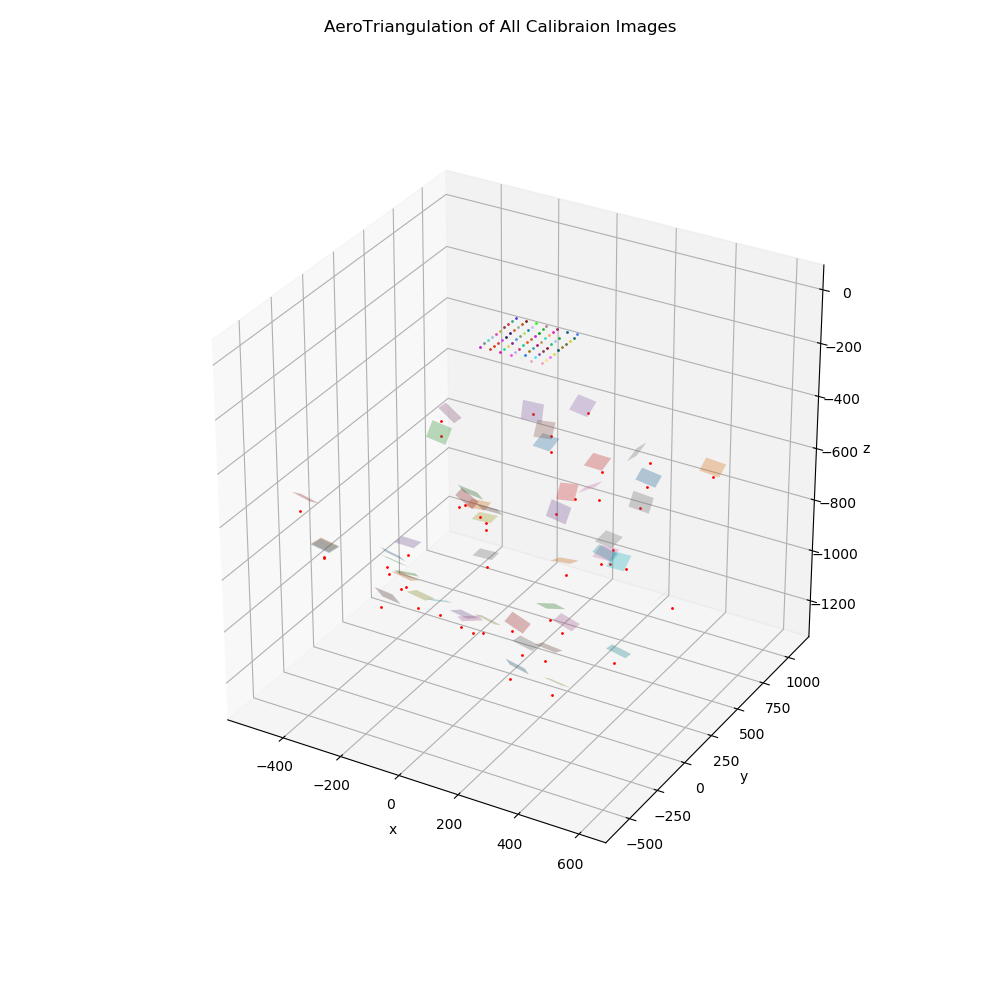

In [32]:
%matplotlib notebook
h, w = cv2.imread(img_fps[0]).shape[:2]
PXYZses = objpoints[0] # shape=(70, 3), use only one chessboard
plot_3d(rvecs, tvecs, mtx, PXYZses, w, h)


In [22]:
# # https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga61585db663d9da06b68e70cfbf6a1eac
# # https://stackoverflow.com/questions/62345076/how-to-convert-a-rodrigues-vector-to-a-rotation-matrix-without-opencv-using-pyth
# import sys
# import math
# def rodrigues_vec_to_rotation_mat(rodrigues_vec):
#     theta = np.linalg.norm(rodrigues_vec)
#     if theta < sys.float_info.epsilon:              
#         rotation_mat = np.eye(3, dtype=float)
#     else:
#         r = rodrigues_vec / theta
#         I = np.eye(3, dtype=float)
#         r_rT = np.array([
#             [r[0]*r[0], r[0]*r[1], r[0]*r[2]],
#             [r[1]*r[0], r[1]*r[1], r[1]*r[2]],
#             [r[2]*r[0], r[2]*r[1], r[2]*r[2]]
#         ])
#         r_cross = np.array([
#             [0, -r[2], r[1]],
#             [r[2], 0, -r[0]],
#             [-r[1], r[0], 0]
#         ])
#         rotation_mat = math.cos(theta) * I + (1 - math.cos(theta)) * r_rT + math.sin(theta) * r_cross
#     return np.array(rotation_mat)

In [17]:
# import math
# import numpy as np
# def yawpitchrolldecomposition(R):
#     sin_x    = math.sqrt(R[2,0] * R[2,0] +  R[2,1] * R[2,1])    
#     singular  = sin_x < 1e-6
#     if not singular:
#         z1    = math.atan2(R[2,0], R[2,1])     # around z1-axis
#         x      = math.atan2(sin_x,  R[2,2])     # around x-axis
#         z2    = math.atan2(R[0,2], -R[1,2])    # around z2-axis
#     else: # gimbal lock
#         z1    = 0                                         # around z1-axis
#         x      = math.atan2(sin_x,  R[2,2])     # around x-axis
#         z2    = 0                                         # around z2-axis
#     return np.array([[z1], [x], [z2]])

# rmat = get_R(rvecs[0])
# yawpitchroll_angles = -180*yawpitchrolldecomposition(rmat)/math.pi
# yawpitchroll_angles[0,0] = (360-yawpitchroll_angles[0,0])%360 # change rotation sense if needed, comment this line otherwise
# yawpitchroll_angles[1,0] = yawpitchroll_angles[1,0]+90